# Hierarchical Autoencoder

This notebook walks the reader through the creation of a
hierarchical autoencoder. This AE is the same as the one
saved in the project folder KerasModels/autoencoder_h.h5.

This AE has four latent space components, and is tuned to
be most efficient. It achieves an accuracy of 91.76%

First, call the needed modules, and preprocess data to be used:

In [4]:
from FlowCompression import AE
train, val, test = AE.preprocess()

Before creating the model, here is a baseline, an original frame
of the flow, which will be out point of comparison.

Original flow


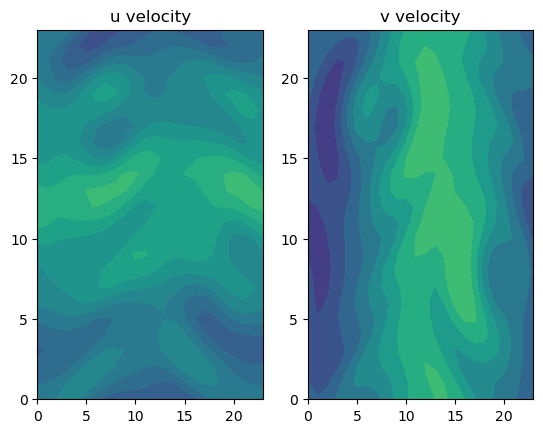

In [5]:
print("Original flow")
AE.u_v_plot(test[0])

Second, we initialize an object from class AE. Here we specify
what type of architecture we want, along with relevant hyperparameters.

In [6]:
model = AE(dimensions=[32, 16, 8, 4], l_rate=0.0005, epochs=50, batch=20)

### Training

Now that we have the data and the model, we need to start
training each encoder individually, while continuously
training the decoder.

Initially, all encoders weights are locked, and the filter
layer is open, meaning all components go through.

To train the first encoder, the filter layer needs to be set,
so only the first component goes through. This is done by
rebuilding the architecture, using h_network.
As well, the weights for the encoder should be unlocked.
Then fitting takes place. Finally, the weights are locked again.

In [7]:
model.h_network(1)
model.encoder1.trainable = True
model.fit(train, val)
model.encoder1.trainable = False

Epoch 1/50
150/150 [==============================] - 7s 11ms/step - loss: 0.0406 - val_loss: 0.0221

Now that the first component is trained, the performance metrics
are applied, a comparing plot is given, along with the corresponding
latent space. The zeros mean the other components are not yet considered.

First component
Absolute %: 78.213 +- 9.888999938964844
Squared %: 96.592 +- 2.6649999618530273


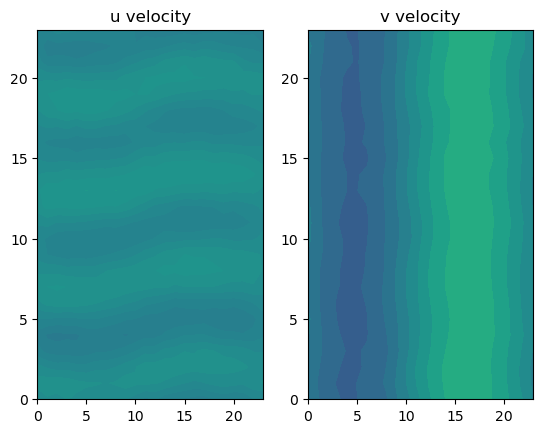

[[[[0.4418448 0.        0.        0.       ]]]]


In [8]:
print("First component")
t1 = model.passthrough(test)
perf = model.performance()
print(f'Absolute %: {round(perf["abs_percentage"], 3)} +- {round(perf["abs_std"], 3)}')
print(f'Squared %: {round(perf["sqr_percentage"], 3)} +- {round(perf["sqr_std"], 3)}')
AE.u_v_plot(t1[0])
print(model.encode((test[0])))

To train the second component, the model needs to be recompiled,
since the filter layer is changed. To achieve this, the trained weights
are saved, the model is recompiled, and the weights set.

In [9]:
w1 = model.autoencoder.get_weights()
model.h_network(2)
model.autoencoder.compile()
model.autoencoder.set_weights(w1)

Now the second component is trained in a similar fashion to the first one.

In [10]:
model.encoder2.trainable = True
model.fit(train, val)
model.encoder2.trainable = False

Epoch 1/50
150/150 [==============================] - 3s 11ms/step - loss: 0.0096 - val_loss: 0.0069

The performance is shown.

Second component
Absolute %: 86.373 +- 5.941999912261963
Squared %: 98.496 +- 1.2920000553131104


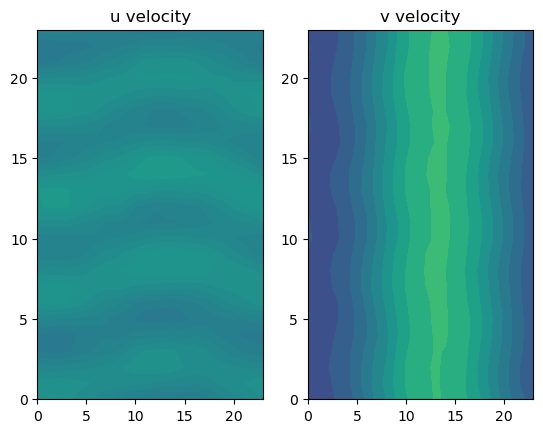

[[[[0.4418448  0.31929374 0.         0.        ]]]]


In [11]:
print("Second component")
t2 = model.passthrough(test)
perf = model.performance()
print(f'Absolute %: {round(perf["abs_percentage"], 3)} +- {round(perf["abs_std"], 3)}')
print(f'Squared %: {round(perf["sqr_percentage"], 3)} +- {round(perf["sqr_std"], 3)}')
AE.u_v_plot(t2[0])
print(model.encode((test[0])))

Repeat for third and fourth components

In [12]:
w2 = model.autoencoder.get_weights()
model.h_network(3)
model.autoencoder.compile()
model.autoencoder.set_weights(w2)

In [13]:
model.encoder3.trainable = True
model.fit(train, val)
model.encoder3.trainable = False

Epoch 1/50
150/150 [==============================] - 4s 17ms/step - loss: 0.0063 - val_loss: 0.0055

Third component
Absolute %: 88.704 +- 5.324999809265137
Squared %: 98.9 +- 1.1460000276565552


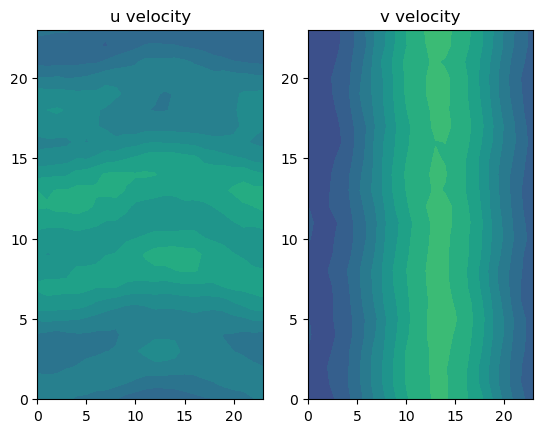

[[[[0.4418448  0.31929374 0.43175375 0.        ]]]]


In [14]:
print("Third component")
t3 = model.passthrough(test)
perf = model.performance()
print(f'Absolute %: {round(perf["abs_percentage"], 3)} +- {round(perf["abs_std"], 3)}')
print(f'Squared %: {round(perf["sqr_percentage"], 3)} +- {round(perf["sqr_std"], 3)}')
AE.u_v_plot(t3[0])
print(model.encode((test[0])))

In [15]:
w3 = model.autoencoder.get_weights()
model.h_network(4)
model.autoencoder.compile()
model.autoencoder.set_weights(w3)

In [16]:
model.encoder4.trainable = True
model.fit(train, val)
model.encoder4.trainable = False

Epoch 1/50
150/150 [==============================] - 2s 11ms/step - loss: 0.0043 - val_loss: 0.0037

### Performance
Now that all components have been trained, the performance shown
represent the final accuracy metrics for the model.

Fourth component
Absolute %: 91.343 +- 5.232999801635742
Squared %: 99.252 +- 1.1080000400543213


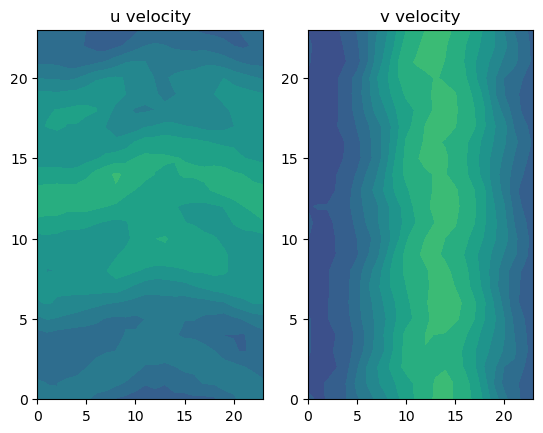

[[[[ 0.4418448   0.31929374  0.43175375 -0.08516616]]]]


In [17]:
print("Fourth component")
t4 = model.passthrough(test)
perf = model.performance()
print(f'Absolute %: {round(perf["abs_percentage"], 3)} +- {round(perf["abs_std"], 3)}')
print(f'Squared %: {round(perf["sqr_percentage"], 3)} +- {round(perf["sqr_std"], 3)}')
AE.u_v_plot(t4[0])
print(model.encode((test[0])))

As well, now the divergence can be checked

In [19]:
print("Original divergence")
_ = model.verification(test)
print("Hierachical model divergence")
_ = model.verification(t4)

Original divergence
max: 0.3381669521331787
min: -2.0029296875
avg: -0.36916595697402954
Hierachical model divergence
max: 0.3266019821166992
min: -0.980778694152832
avg: -0.3461073935031891


The model can also be saved

In [ ]:
save = False
if save:
    model.autoencoder.trainable = True
    model.autoencoder.save('autoencoder_h.h5')
    model.encoder.save('encoder_h.h5')
    model.decoder.save('decoder_h.h5')